In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import swifter

In [2]:
cyber = pd.read_csv("cybersecurity_tweets.csv")
not_cyber = pd.read_csv("not_cybersecurity_tweets.csv")

In [3]:
# Use pandas.concat() method to ignore_index 
df = pd.concat([cyber, not_cyber], ignore_index=True, axis = 0)

In [4]:
df.head()

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1


In [5]:
df.tail()

,text,label
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0
399996,Aviso para los usuarios de correo de @AytoMurc...,0
399997,NPM had an obfuscated birthday-like easter egg...,0
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0
399999,A new Android banking malware named Octo has a...,0


In [6]:
# Data Structure
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(400000, 2)

In [8]:
# Datatypes
df.dtypes

text     object
label     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    400000 non-null  object
 1   label   400000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [10]:
# Checking for null values
df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
# Check for duplicates
df[df.duplicated()]

,text,label
473,#programming #programmer #Python #javascript #...,1
985,#Security #programming #js #webdev #cybersecu...,1
1051,#programmer #Python #NodeJS #javascripttflx #...,1
1210,The CEO's Critical Role In Driving Cybersecuri...,1
1240,#Security #programming #js #webdev #cybersecu...,1
...,...,...
399872,#Polyswarm marketplace is a community and netw...,0
399888,🔌 Unmetered 100Mbps - 40Gbps ⚡ No saturation &...,0
399930,Malware ve Türleri https://t.co/wFfWW0RCm0 #te...,0
399935,Cisco connects thousands of journalists to the...,0


In [12]:
# Drop duplicates
df.drop_duplicates(keep='first',inplace= True)

In [13]:
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0
399996,Aviso para los usuarios de correo de @AytoMurc...,0
399997,NPM had an obfuscated birthday-like easter egg...,0
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


## Data Preprocessing

In [14]:
df['label'].value_counts()

0    195126
1    195036
Name: label, dtype: int64

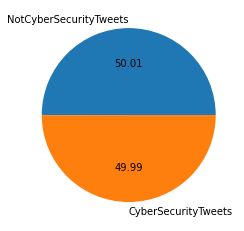

In [15]:
plt.pie(df['label'].value_counts(),labels=['NotCyberSecurityTweets','CyberSecurityTweets'],autopct='%0.2f')
plt.show()

# TEXT PROCESSING (Clean, Tokenize and Normalise)

In [16]:
# import nltk
# nltk.download('stopwords')
# nltk.download(['punkt', 'wordnet'])
# nltk.download('omw-1.4')

In [17]:
STOPWORDS=set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

def tokenize(text):
    
   #1. Remove links
    text = re.sub(r"http\S+", "", text)

   #2. Normalize the data by converting to lower case and removing punctuations
    text = re.sub("[^a-zA-Z]", " ", text.lower())
    
   #3. Tokenizing: split text into words
    tokens = word_tokenize(text)
    
   #4. Remove stop words
    words = [w for w in tokens if w not in STOPWORDS]
    
    #5. Lemmatize 
    lemmed_words = [lemmatizer.lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
        ## back to string from list
    text = " ".join(clean_tokens)
    return text

In [18]:
df['Cleantext'] = df['text'].swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [19]:
df.head()

,text,label,Cleantext
0,#AI Robo-Advisers and the Future of Financial ...,1,ai robo adviser future financial advice datapr...
1,Hackers causing havoc on Mexican banking syste...,1,hacker causing havoc mexican banking system cy...
2,CVE-2019-13127 An issue was discovered in mxGr...,1,cve issue discovered mxgraph related diagram p...
3,How to protect your online identity #labourcyb...,1,protect online identity labourcyberattack cybe...
4,Forensic Acquisition - Shadow Cyber Sec https...,1,forensic acquisition shadow cyber sec cybersec...


In [20]:
df['Cleantext'][2]

'cve issue discovered mxgraph related diagram plugin confluence product improper input validation sanitization color field lead x as'

In [21]:
# assigning the independent features to X and the target variable to y
X = pd.DataFrame(df['Cleantext'])
y = df['label']

In [22]:
X.head()

,Cleantext
0,ai robo adviser future financial advice datapr...
1,hacker causing havoc mexican banking system cy...
2,cve issue discovered mxgraph related diagram p...
3,protect online identity labourcyberattack cybe...
4,forensic acquisition shadow cyber sec cybersec...


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

# Split the dataset into Training and Testing datasets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#spliting the data into training 70% and test 30%
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

X_train,X_test,y_train,y_test.shape

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (273113, 1)
Shape of testing data: (117049, 1)


In [26]:
X_train.head()

,Cleantext
155601,icymi fbi cisagov secretservice nsagov release...
370040,capital one reach million settlement connectio...
162290,hala ayala halaayala ayala american cybersecur...
277214,retired san jose police officer convicted mult...
53636,latest puchi herald daily thanks nickpmclaren ...


In [27]:
x_train = X_train.iloc[:,0]
x_train.head()

155601    icymi fbi cisagov secretservice nsagov release...
370040    capital one reach million settlement connectio...
162290    hala ayala halaayala ayala american cybersecur...
277214    retired san jose police officer convicted mult...
53636     latest puchi herald daily thanks nickpmclaren ...
Name: Cleantext, dtype: object

# TfidfVectorizer - Feature Extraction

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=1000)

In [29]:
x = tfidf.fit_transform(x_train).toarray()

In [30]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
x.shape

(273113, 1000)

In [32]:
x_test = X_test.iloc[:,0]

In [33]:
x_test.head()

396334    podcast chinese government linked group hacker...
71051     adobe patch major security flaw pdf reader pho...
202643    microsoft power apps misconfiguration expose m...
156628    doj battle ransomware attack corruption crime ...
52546     rt gaiapluto rt eli krumova datascience trend ...
Name: Cleantext, dtype: object

In [34]:
test_x = tfidf.transform(x_test)

In [35]:
print(test_x.toarray().shape)

(117049, 1000)


# Model Building

# Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
clf= LogisticRegression(max_iter=5000)
clf.fit(x,y_train)
y_pred = clf.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

NameError: name 'x' is not defined

In [38]:
text = [df['Cleantext'][200023]]
text

['el esc ndalo de phishing de opensea revela la necesidad de mejorar la seguridad en el panorama de los nft']

In [39]:
df['label'][200023]

0

In [40]:
text = tfidf.transform(text).toarray()

In [41]:
text[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
pr = clf.predict(text)
pr

array([0])

In [43]:
pre = clf.predict_proba(text)

In [44]:
pre

array([[0.96504854, 0.03495146]])

# MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
clf1 = MultinomialNB()
clf1.fit(x,y_train)
y_pred = clf1.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9
Other Metrics:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     58465
           1       0.89      0.91      0.90     58584

    accuracy                           0.90    117049
   macro avg       0.90      0.90      0.90    117049
weighted avg       0.90      0.90      0.90    117049

[[52077  6388]
 [ 5239 53345]]


# SGDClassifier

In [47]:
from sklearn.linear_model import SGDClassifier

In [48]:
clf3= SGDClassifier(early_stopping= True)
clf3.fit(x,y_train)
y_pred = clf3.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy : 0.98
Other Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     58465
           1       1.00      0.95      0.98     58584

    accuracy                           0.98    117049
   macro avg       0.98      0.98      0.98    117049
weighted avg       0.98      0.98      0.98    117049

[[58397    68]
 [ 2650 55934]]


# Deployment

In [49]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))